### PBI PC Optimisation Using a 2D Discrete Fast Fourier Transform (and gradient values as a bonus)

We need `matplotlib.pyplot` for some quick visualisation, `numpy` for the fft function, `skimage` for io and filter functions (read the image from disk). Don't read too much into this, it was a 30 min. job.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, filters, morphology

%matplotlib inline

I've provided the PBI_-123_348+58_4145.tif file with this notebook which needs to be loaded as a grayscale image.  I set a sigma value range from 0 to 50 `np.arange()` and blur the original sample image to the set sigma value `filters.gaussian()` then compute the fourier tranform `np.fft.fft2()`. I remove the imaginary part of the discrete fourier transform `np.real()` and then determine the maximum `np.max()`. I do a similar computation for the gradient `filters.rank.gradient()` with a disk diameter of 5. This can be optimised too.

In [2]:
test_image = io.imread("PBI_-123_348+58_4145.tif", as_gray=True) # Raw data image 16-bit tiff from 2D radiograph in the CT scanner.
sigma = np.arange(1, 50, 1) # The sigma range
fft_v = np.empty(len(sigma)) # Empty fft values to be filled
mmg_v = np.empty(len(sigma)) # Empty mean gradient values

for ii in range(0, len(sigma)): # Loop through the sigma range
    im = filters.gaussian(test_image, sigma=sigma[ii]) # Gaussian blur from 0 to 50
    fft_v[ii] = np.max(np.real(np.fft.fft2(im))) # Strip the imaginary part of the fft spectrum and compute the maximum
    mmg_v[ii] = np.max(filters.rank.gradient(im, selem=morphology.disk(5)))

C:\Users\cenjv\Anaconda3\lib\site-packages\skimage\filters\rank\generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


I've knocked together this plot to demonstrate; don't be too bothered about this bit of code, only the figure)

(0, 50)

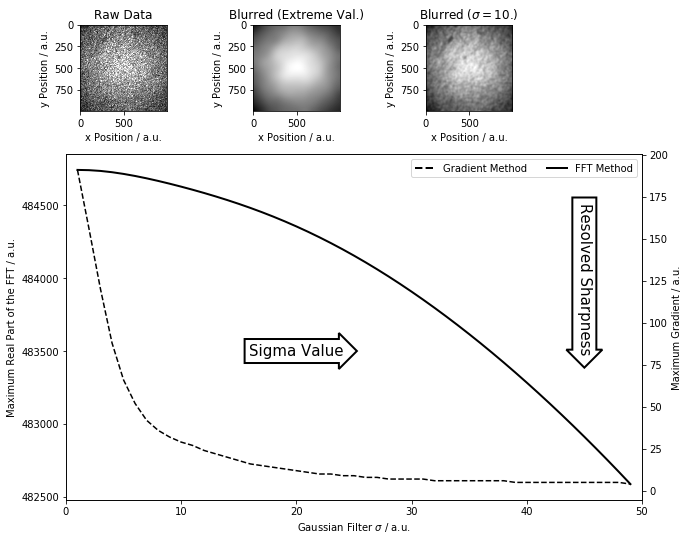

In [3]:
fig = plt.figure(figsize=(8,6))
ax0 = fig.add_axes((0.0, 0.0, 1.0, 0.8))
ax1 = fig.add_axes((0.0, 0.9, 0.2, 0.2))
ax2 = fig.add_axes((0.3, 0.9, 0.2, 0.2))
ax3 = fig.add_axes((0.6, 0.9, 0.2, 0.2))

ax0.plot(sigma[0], fft_v[0], c='k', lw=2, ls='--', label='Gradient Method') # ARBITRARY... can be ignored
ax0.plot(sigma, fft_v, c='k', lw=2, label='FFT Method')
ax1.imshow(test_image, cmap='gray')
ax2.imshow(filters.gaussian(test_image, sigma=sigma[-1]), cmap='gray') # indicative
ax3.imshow(filters.gaussian(test_image, sigma=10), cmap='gray') # 

ax1.set_title("Raw Data")
ax2.set_title("Blurred (Extreme Val.)")
ax3.set_title("Blurred ($\sigma = 10$.)")

ax0.set_xlabel("Gaussian Filter $\sigma$ / a.u.")
ax0.set_ylabel("Maximum Real Part of the FFT / a.u.")

ax1.set_xlabel("x Position / a.u.")
ax1.set_ylabel("y Position / a.u.")
ax2.set_xlabel("x Position / a.u.")
ax2.set_ylabel("y Position / a.u.")
ax3.set_xlabel("x Position / a.u.")
ax3.set_ylabel("y Position / a.u.")

ax01 = ax0.twinx()
ax01.plot(sigma, mmg_v, c='k', ls='--')
ax01.set_ylabel("Maximum Gradient / a.u.")

bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=2)
t = ax0.text(20, 483500, "Sigma Value", ha="center", va="center", rotation=0, size=15, bbox=bbox_props)
t = ax0.text(45, 484000, "Resolved Sharpness", ha="center", va="center", rotation=-90, size=15, bbox=bbox_props)

ax0.legend(ncol=2)
ax0.set_xlim(0, 50)

So computing the gradient basically gives a sharper drop-off towards extreme values of sigma, beyond like 15 to 20 this is pretty useless. So the FFT method is potentially more sensitive to more extreme values... lets do both and compare the optimum PBI values. This is <i>probably</i> a non-issue. I'll get the rest of the code done for soon.